## BRAIN WEIGHT AND BODY WEIGHT

Brain vs. Body Weight
In the file brain_body.txt, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

Tasks
Find the linear regression equation for this data for brain weight to body weight.
Chart the original data and the equation on the chart.
Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_fwf("brain_body.txt")

DATA - clean, EDA, encode, split, scale

In [3]:
df.shape

(62, 2)

In [4]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [5]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [6]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [7]:
iqr = df.Brain.quantile(0.75) - df.Brain.quantile(0.25)
upper_threshold = df.Brain.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Brain.quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(119.60625, -70.80375000000001)

In [8]:
df['Brain'][df['Brain'] >= upper_threshold] = upper_threshold

In [9]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,29.176476,283.134194
std,45.213842,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,119.606250,5712.000000


In [10]:
df.dtypes

Brain    float64
Body     float64
dtype: object

EDA

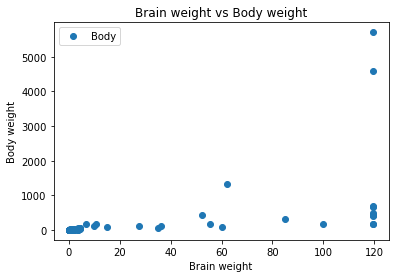

In [11]:
df.plot(x= 'Brain', y= 'Body', style = 'o')
plt.title('Brain weight vs Body weight')
plt.xlabel('Brain weight')
plt.ylabel('Body weight')
plt.show()

In [12]:
df.corr()

,Brain,Body
Brain,1.000000,0.510595
Body,0.510595,1.000000


Since the correlation is 0.5 its shows linear relation.

In [13]:
X = df.loc[:,['Brain']].values
y = df.loc[:,['Body']].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 88)

In [15]:
X_train.shape, X_test.shape, y_test.shape

((49, 1), (13, 1), (13, 1))

MODEL

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() #y =mx+c
regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
#c
print(regressor.intercept_)

[-47.69157627]


In [18]:
#m
print(regressor.coef_)

[[12.86901006]]


1.Find the linear regression equation for this data for brain weight to body weight. 

In [ ]:
#body_weight = 12.86 * (brain_weight) - 47.69

Chart the original data and the equation on the chart

In [23]:
y_pred = regressor.predict(X_test)

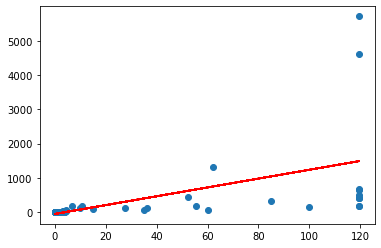

In [26]:
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color = 'red')
plt.show()

2.Find the equation's 𝑅2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [20]:
y_pred = regressor.predict(X_test)
y_pred

array([[   7.49073888],
       [1491.52245875],
       [1491.52245875],
       [ -47.39558904],
       [ -30.31841269],
       [  -9.08454608],
       [  88.07647991],
       [1491.52245875],
       [ -44.08825346],
       [ 666.5384823 ],
       [   6.2295759 ],
       [ -25.81425916],
       [ 750.18704772]])

In [21]:
from sklearn import metrics
print('R2_SCORE is', metrics.r2_score(y_test, y_pred))

R2_SCORE is -1.3945041339377324
